# Part - 1

## Import Libraries

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Initialize a Random Seed
np.random.seed(42)

## Gradient Descent and its Variants - 1

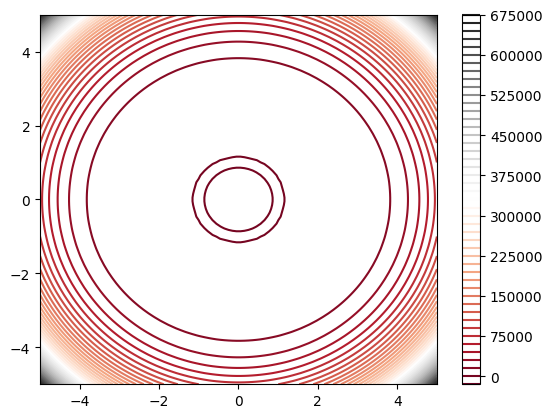

In [5]:
import numpy as np
import matplotlib.pyplot as plt

import numpy as np

def Arbitrary(x, y):
    return (50 * ((x**2 + y**2)**3) / 9) - (209 * (x**2 + y**2)**2 / 18) + (50 * (x**2 + y**2) / 9)

def Arbitrary_grad(x, y):
    # Calculate the partial derivatives
    dA_dx = (150 * x * 2 * (x**2 + y**2)**2 / 9) - (418 * x * 2 * (x**2 + y**2) / 9) + (200*x/9)
    dA_dy = (150 * y * 2 * (x**2 + y**2)**2 / 9) - (418 * y * 2 * (x**2 + y**2) / 9) + (200*y/9)
    
    return np.array([dA_dx, dA_dy])

# Randomly initialize a vector x, y
Init = np.array([2, 2])

# Set the learning rate
lr = 0.0001

# Plotting the Contour Plot of the Arbitrary Function
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = Arbitrary(X, Y)
plt.contour(X, Y, Z, 50, cmap='RdGy')
plt.colorbar()




## Vanilla Gradient Descent

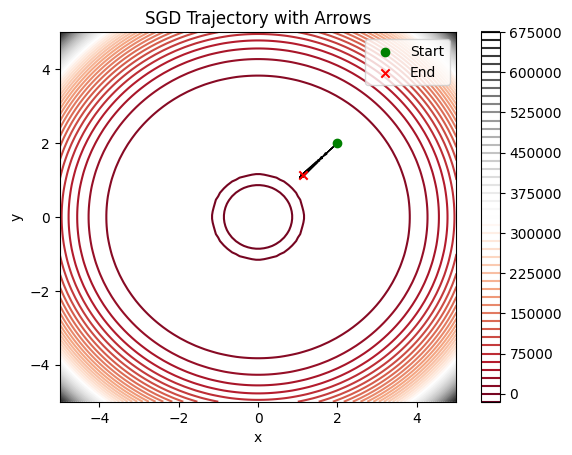

Final X:  1.1230254755723357
Final Y:  1.1230254755723357
Done


In [6]:
# Plotting the Contour Plot of the Arbitrary Function
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = Arbitrary(X, Y)
plt.contour(X, Y, Z, 50, cmap='RdGy')
plt.colorbar()

Path = []

# In the same plot, plot the path of the gradient descent algorithm
# Using Stochastic Gradient Descent -> Store the values of x, y in a list
while True:
    grad = Arbitrary_grad(Init[0], Init[1])
    # Clip -> To prevent overflowing
    Init = np.clip(Init, -1e5, 1e5)
    Path.append(Init)
    Init = Init - lr * grad
    if np.linalg.norm(grad) < 0.001:
        break

# Convert the Path to a numpy array
Path = np.array(Path)

# Plot arrows for each individual point
for i in range(1, len(Path)):
    dx = Path[i][0] - Path[i-1][0] 
    dy = Path[i][1] - Path[i-1][1]
    plt.arrow(Path[i-1][0], Path[i-1][1], dx, dy, head_width=0.05, head_length=0.1, fc='k', ec='k')

# Plot the starting point and ending point
plt.scatter(Path[0][0], Path[0][1], c='g', marker='o', label='Start')
plt.scatter(Path[-1][0], Path[-1][1], c='r', marker='x', label='End')

plt.legend()
plt.title('SGD Trajectory with Arrows')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Print Final X and Y values
print("Final X: ", Path[-1][0])
print("Final Y: ", Path[-1][1])

print("Done")

## Polyak Momentum Method

In [ ]:
# Plotting the Contour Plot of the Arbitrary Function
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = Arbitrary(X, Y)
plt.contour(X, Y, Z, 50, cmap='RdGy')
plt.colorbar()

Path = []

alpha = 0.9 # Momentum Hyperparameter

grad = 0

# Use Polyak's Momentum Method -> Store the values of x, y in a list same as above
while True:
    addition_term = alpha * grad
    grad = Arbitrary_grad(Init[0], Init[1])
    grad = addition_term + grad
    # Clip -> To prevent overflowing
    Init = np.clip(Init, -1e5, 1e5)
    Path.append(Init)
    Init = Init - lr * grad
    if np.linalg.norm(grad) < 0.01:
        break

# Convert the Path to a numpy array
Path = np.array(Path)

# Plot arrows for each individual point
for i in range(1, len(Path)):
    dx = Path[i][0] - Path[i-1][0] 
    dy = Path[i][1] - Path[i-1][1]
    plt.arrow(Path[i-1][0], Path[i-1][1], dx, dy, head_width=0.05, head_length=0.1, fc='k', ec='k')

# Plot the starting point and ending point
plt.scatter(Path[0][0], Path[0][1], c='g', marker='o', label='Start')
plt.scatter(Path[-1][0], Path[-1][1], c='r', marker='x', label='End')

plt.legend()
plt.title('Polyak\'s Momentum Trajectory with Arrows')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Print Final X and Y values
print("Final X: ", Path[-1][0])
print("Final Y: ", Path[-1][1])

Init = np.array([2, 2])

## Nestorov's Accelerated Gradient Descent

In [ ]:
# Plotting the Contour Plot of the Arbitrary Function
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = Arbitrary(X, Y)
plt.contour(X, Y, Z, 50, cmap='RdGy')
plt.colorbar()

Path = []

alpha = 0.9 # Momentum Hyperparameter
grad = 0 # Gradient

T = 0 # Number of Iterations

# Use Nesterov's Accelerated Gradient Method -> Store the values of x, y in a list same as above
while True:
    # print("Entered While")
    if T == 0:
        temp_init = Init
        T += 1
    else:
        print("Entered else")
        temp_init = Init - lr * grad * alpha
        print(Init)
        # Find Gradient Here
        grad = Arbitrary_grad(temp_init[0], temp_init[1])
        print(grad)
        Init = temp_init - lr * grad
        # Clip -> To prevent overflowing
        Init = np.clip(Init, -1e5, 1e5)
        # print(grad)
        Path.append(Init)
        if np.linalg.norm(grad) < 0.01:
            break

# Convert the Path to a numpy array
Path = np.array(Path)

# Plot arrows for each individual point
for i in range(1, len(Path)):
    dx = Path[i][0] - Path[i-1][0] 
    dy = Path[i][1] - Path[i-1][1]
    plt.arrow(Path[i-1][0], Path[i-1][1], dx, dy, head_width=0.05, head_length=0.1, fc='k', ec='k')

# Plot the starting point and ending point
plt.scatter(Path[0][0], Path[0][1], c='g', marker='o', label='Start')
plt.scatter(Path[-1][0], Path[-1][1], c='r', marker='x', label='End')

plt.legend()
plt.title('Nesterov \'s Gradient Descent Trajectory with Arrows')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Final X:  1.6101074003218694
Final Y:  0.901162968160474


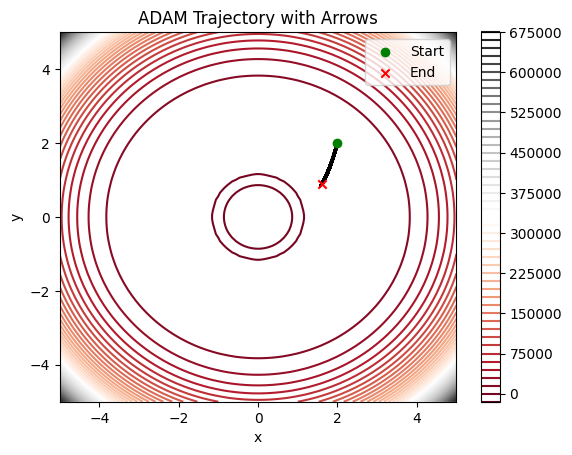

In [3]:
# Do it with the ADAM Optimizer
# Plotting the Contour Plot of the Arbitrary Function
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = Arbitrary(X, Y)
plt.contour(X, Y, Z, 50, cmap='RdGy')
plt.colorbar()

Path = []


# Find the Gradient of the Arbitrary Function and Square it
def Arbitrary_grad_squared(x, y):
    arr = [2*x - 400*x*(y-x**2), 200*(y-x**2)]
    arr = np.array(arr)
    arr = arr**2
    return arr

# We use this function to account for the RMS Value of ADAM
def RMS_Update(gamma, grad_squared, prev_grad):
    return gamma * prev_grad + (1-gamma) * grad_squared

# We use this function to account for the Momentum Value of ADAM
def Momentum_Update(beta, grad_squared,  prev_grad):
    return beta * prev_grad + (1-beta) * grad_squared

def Normalize_Grad(grad, beta, itr):
    return grad / (1 - beta**itr)

def Normalize_RMS(grad, gamma, itr):
    return grad / (1 - gamma**itr)

def Change_Grad(grad, RMS):
    return grad / (np.sqrt(RMS) + 1e-8)

# Implement the While Loop with ADAM
Init = np.array([2, 2])

# Initially set the values of beta and gamma
beta = 0.9 # Momentum Hyperparameter -> High as it is paired with a degree 1 term
gamma = 0.999 # RMS Hyperparameter -> Low as it is paired with a degree 2 term

grad = 0
grad_squared = 0

itr = 1

while True:
    grad_temp = Arbitrary_grad(Init[0], Init[1])
    grad_squared_temp = Arbitrary_grad_squared(Init[0], Init[1])

    grad_squared = RMS_Update(gamma, grad_squared_temp, grad_squared)
    grad = Momentum_Update(beta, grad_temp, grad)

    Normalized_Grad = Normalize_Grad(grad, beta, itr)
    Normalized_RMS = Normalize_RMS(grad_squared, gamma, itr)

    Final_grad = Change_Grad(Normalized_Grad, Normalized_RMS)

    Init = np.clip(Init, -1e5, 1e5)
    Path.append(Init)
    Init = Init - lr * Final_grad
    if np.linalg.norm(grad) < 0.01 or itr > 10000:
        break

    itr += 1

# Convert the Path to a numpy array
Path = np.array(Path)

# Plot arrows for each individual point
for i in range(1, len(Path)):
    dx = Path[i][0] - Path[i-1][0] 
    dy = Path[i][1] - Path[i-1][1]
    plt.arrow(Path[i-1][0], Path[i-1][1], dx, dy, head_width=0.05, head_length=0.1, fc='k', ec='k')

# Plot the starting point and ending point
plt.scatter(Path[0][0], Path[0][1], c='g', marker='o', label='Start')
plt.scatter(Path[-1][0], Path[-1][1], c='r', marker='x', label='End')

# Print out the Last X and Y Values
print("Final X: ", Path[-1][0])
print("Final Y: ", Path[-1][1])

plt.legend()
plt.title('ADAM Trajectory with Arrows')
plt.xlabel('x')
plt.ylabel('y')
plt.show()